In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
path = 'cleaned.csv'
df = pd.read_csv(path).dropna(how="any")

In [49]:
df.head()


,Name,FIPS,1-0-1,1-1-1,1-2-1,1-3-1,2-0-1,2-1-1,2-2-1,2-3-1,...,2-3-2,Median Wage,% Less then Highschool Diploma,% High School Diploma Only,% Some College or Associates,% Bachelo's Degree or higher,% Civilian Labor Force,% Employed,% Unemployed,% Total Crimes
0,Abbeville,45001,-0.412555,0.225781,0.465322,0.847885,-0.015076,0.228852,0.390740,0.490329,...,-0.072109,22.793627,0.129286,0.239761,0.225767,0.109776,0.412431,0.399136,0.013295,22.226796
1,Acadia,22001,-0.393400,0.316276,0.609542,1.047389,0.002030,0.272492,0.438964,0.539760,...,0.027571,21.925490,0.150636,0.295870,0.174013,0.095144,0.418751,0.397214,0.021537,67.562873
2,Accomack,51001,-0.424654,0.170948,0.408412,0.754913,-0.040659,0.166207,0.321787,0.389881,...,-0.119096,23.203431,0.130488,0.258372,0.177715,0.136953,0.499386,0.482327,0.017059,26.935624
3,Ada,16001,-0.596769,-0.176043,0.022892,0.338084,-0.322493,-0.205671,-0.096186,0.000318,...,-0.324468,35.438725,0.030099,0.139118,0.213133,0.239620,0.512513,0.500262,0.012251,33.982063
4,Adair,19001,-0.523225,-0.004930,0.256505,0.605554,-0.186843,-0.036245,0.097463,0.207596,...,-0.193880,28.420098,0.039488,0.276681,0.240128,0.126067,0.574306,0.560832,0.013474,2.668090


In [50]:
##### Only Wage Data
# X = df.drop(['Name', "FIPS", "% Total Crimes", 'Median Wage', "% Less then Highschool Diploma",'% High School Diploma Only', '% Some College or Associates',"% Bachelo's Degree or higher", '% Civilian Labor Force', "% Employed", "% Unemployed", '% Total Crimes'], axis=1)
##### Only education data
# X = df[["% Less then Highschool Diploma",'% High School Diploma Only', '% Some College or Associates',"% Bachelo's Degree or higher", '% Civilian Labor Force', "% Employed", "% Unemployed"]]
##### All Data
X = df.drop(['Name', "FIPS", "% Total Crimes", 'Median Wage'], axis=1)
y = df['% Total Crimes']

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#scale everything
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)



In [52]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression

In [53]:
def test_model(model):
    reg = model.fit(X_train_scale, y_train)
    print(f'Model: {type(reg).__name__}')
    print(f'Train score: {reg.score(X_train_scale, y_train)}')
    print(f'Test Score: {reg.score(X_test_scale, y_test)}\n')
    print()
    plt.scatter(y_test, model.predict(X_test_scale))
    plt.show()


Model: LinearRegression
Train score: 0.16794649882688606
Test Score: 0.05800727714764131




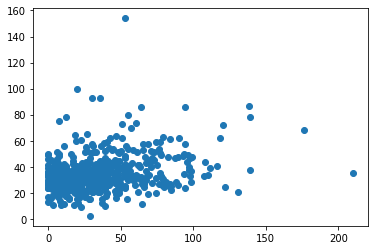

Model: KNeighborsRegressor
Train score: 0.33426972841885605
Test Score: -0.10975734530328896




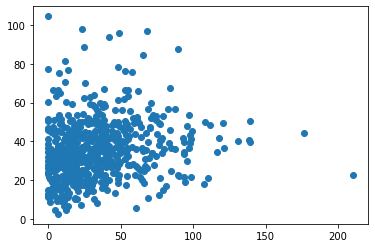

Model: RandomForestRegressor
Train score: 0.8724557697440345
Test Score: 0.06668990775233097




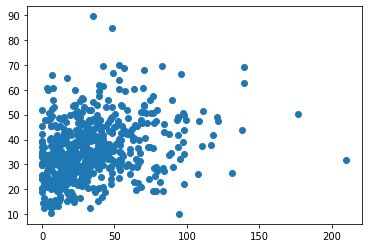

Model: ExtraTreesRegressor
Train score: 1.0
Test Score: 0.051851785307374665




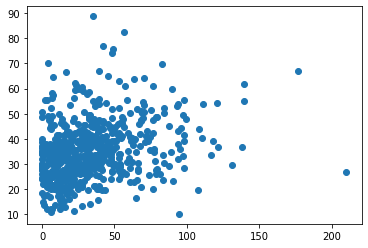

Model: AdaBoostRegressor
Train score: -0.33607186618455653
Test Score: -0.5978193142661725




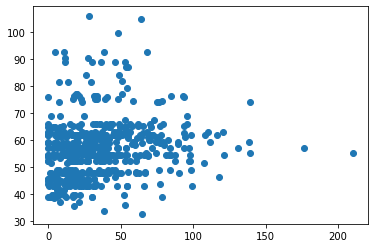

In [54]:
test_model(LinearRegression())
test_model(KNeighborsRegressor())
test_model(RandomForestRegressor())
test_model(ExtraTreesRegressor())
test_model(AdaBoostRegressor())